# Instruction Tuning with GPT-4

This notebook is developed to produce the figures in the paper:

```
``Instruction Tuning with GPT-4'' (https://arxiv.org/abs/2304.03277)
Baolin Peng*, Chunyuan Li*, Pengcheng He*, Michel Galley, Jianfeng Gao (*Equal Contribution)
```

- Project: https://instruction-tuning-with-gpt-4.github.io/
- Github Repo: https://github.com/Instruction-Tuning-with-GPT-4/GPT-4-LLM

Please submit an issue in the github repo, if you have any questions.

---
## Compare the data stats of GPT4 and GPT3 for Alpaca instructions.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

top_k = 25

list_pair_gpt4, list_count_gpt4 = [], []
for verb_noun_pair, count in pd_count_gpt4[:top_k].to_dict().items():
    list_pair_gpt4.append(verb_noun_pair)
    list_count_gpt4.append(count)


list_pair_gpt3, list_count_gpt3 = [], []
for verb_noun_pair, count in pd_count_gpt3[:top_k].to_dict().items():
    list_pair_gpt3.append(verb_noun_pair)
    list_count_gpt3.append(count)


In [6]:
import pandas as pd
import json
import tqdm

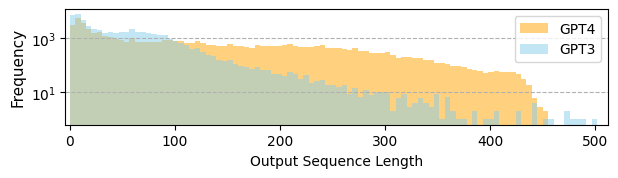

In [ ]:
import numpy as np
import seaborn as sns

fig = plt.figure(figsize=(7,1.5)) # Create matplotlib figure
bins = np.linspace(0, 512, 100)

plt.hist(gpt4_output_len, bins, alpha=0.5, label='GPT4', color='orange')
plt.hist(gpt3_output_len, bins, alpha=0.5, label='GPT3', color='skyblue')

ax = plt.gca()
plt.xlim(-4,512)

ax.set_yscale('log')
ax.yaxis.grid(True, linestyle='--', alpha=1.0)

plt.xlabel('Output Sequence Length', fontsize=10)
plt.ylabel('Frequency', fontsize=11)

plt.legend(loc='upper right')
plt.show()
fig.savefig('output/cmp_seq_len_freq_gpt3_gpt4.pdf', bbox_inches='tight')

---

## Comparison/Feedback Data Disitrution

#### Three models: ['text-davinci-003', 'icm-1.3b', 'gpt4']

In [7]:
import os, json
import numpy as np
import pandas as pd
import seaborn as sns

---

# Evaluation benchmark data analysis

#### * 252 unseen user oriented instructions from self-instruct (https://github.com/yizhongw/self-instruct/blob/main/human_eval/user_oriented_instructions.jsonl)

In [13]:
 import os

#### * 80 unseen instructions from Vicuna (https://github.com/lm-sys/FastChat/blob/main/fastchat/eval/table/question.jsonl)

In [14]:
import os, json

In [11]:
import os

---

## Pie Chart on the Human Evaluation Results

The 252 instructions from self instruct is used

#### * LLaMA-GPT4 vs GPT

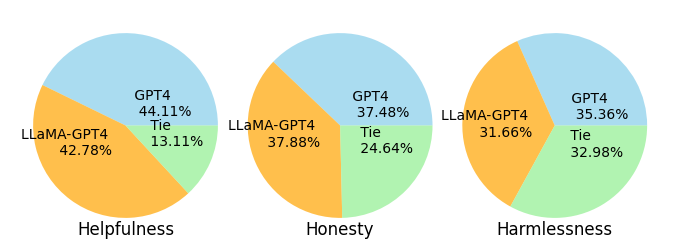

In [16]:
llama_gpt4_vs_gpt4 = {'Helpfulness': {'llama_gpt4_win': 0.4278145695364238, 'gpt4_win': 0.4410596026490066, 'Tie': 0.1311258278145695}, 'Honesty': {'llama_gpt4_win': 0.37880794701986753, 'gpt4_win': 0.3748344370860927, 'Tie': 0.2463576158940397}, 'Harmlessness': {'llama_gpt4_win': 0.3165562913907285, 'gpt4_win': 0.3536423841059603, 'Tie': 0.32980132450331123}}


fig, axs = plt.subplots(1, 3, figsize=(9,3))

for i, (k,v) in enumerate(llama_gpt4_vs_gpt4.items()):
    colors = ['skyblue', 'orange', 'lightgreen']
    labels = [f" GPT4 \n  {v['gpt4_win']*100:.2f}%", f"LLaMA-GPT4 \n {v['llama_gpt4_win']*100:.2f}%", f" Tie \n {v['Tie']*100:.2f}%"]
    axs[i].pie(v.values(), labels=labels, colors=colors,  labeldistance=0.24, wedgeprops={'alpha':0.7})
    axs[i].set_title(k, y=-0.01)

plt.subplots_adjust(wspace=-.2)
plt.rcParams.update({'font.size': 10})

plt.show()


#### * LLaMA-GPT4 vs Alpaca (LLaMA-GPT3)

In [17]:
 llama_gpt3_vs_llam_gpt4 = { "Helpfulness":{ "llama_gpt3_win":0.19744318181818182, "llama_gpt4_win":0.5411931818181818, "Tie":0.26136363636363646 }, "Honesty":{ "llama_gpt3_win":0.31392045454545453, "llama_gpt4_win":0.2599431818181818, "Tie":0.42613636363636365 }, "Harmlessness":{ "llama_gpt3_win":0.25426136363636365, "llama_gpt4_win":0.16477272727272727, "Tie":0.5809659090909091 } }

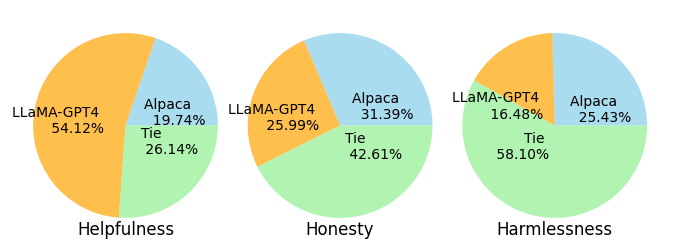

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(9,3))

for i, (k,v) in enumerate(llama_gpt3_vs_llam_gpt4.items()):
    colors = ['skyblue', 'orange', 'lightgreen']
    labels = [f"Alpaca \n  {v['llama_gpt3_win']*100:.2f}%", f"LLaMA-GPT4 \n {v['llama_gpt4_win']*100:.2f}%", f"Tie \n {v['Tie']*100:.2f}%"]
    axs[i].pie(v.values(), labels=labels, colors=colors,  labeldistance=.24, wedgeprops={'alpha':0.7})
    axs[i].set_title(k, y=-0.01)

plt.subplots_adjust(wspace=-.2)
plt.rcParams.update({'font.size': 10})

plt.show()


---

## GPT4 Evaluation

The 80 questions from Vicuna is used (https://github.com/lm-sys/FastChat)

#### * All chatbots are compared against gpt4

In [24]:
review_gpt35_gpt4 = [652.0, 714.0]
review_gpt4_gpt35 = [613.0, 521.0]
review_llama_gpt4_gpt4 = [606.0, 726.5]
review_llama_gpt4_gpt4_r1 = [631.0, 722.5]
review_llama_gpt4 = [520.0, 731.5]
review_alpaca_gpt4 = [593.0, 745.5]
review_vicuna_gpt4 = [640.0, 715.5]
review_bard_gpt4 = [633.0, 722.0]
review_gpt4_gpt4 = [760.0, 760.0]

#### * All chatbots are compared against ChatGPT

#### * The effectivness of the reward model: each ranked group is comapared against GPT and ChatGPT, respectively

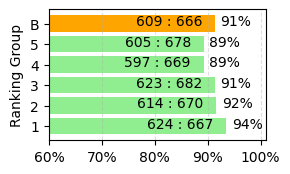

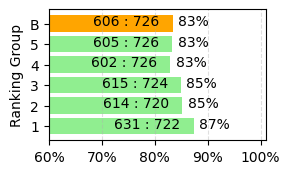

In [29]:
import re

llama_gpt4_rank0_gpt35 = [624.0, 667.0]
llama_gpt4_rank0_gpt4 = [631.0, 722.5]
llama_gpt4_rank1_gpt35 = [614.0, 670.0]
llama_gpt4_rank1_gpt4 = [614.0, 720.5]
llama_gpt4_rank2_gpt35 = [623.0, 681.5]
llama_gpt4_rank2_gpt4 = [615.0, 724.0]
llama_gpt4_rank3_gpt35 = [597.0, 669.0]
llama_gpt4_rank3_gpt4 = [602.0, 726.0]
llama_gpt4_rank4_gpt35 = [605.0, 677.5]
llama_gpt4_rank4_gpt4 = [605.0, 726.0]


review_llama_gpt4_gpt4 = [606.0, 726.5]
review_llama_gpt4_gpt35 = [609.0, 666.5]


llama_gpt4_ranks_gpt35 = [[624.0, 667.0], [614.0, 670.0], [623.0, 681.5], [597.0, 669.0], [605.0, 677.5]] + [review_llama_gpt4_gpt35]
llama_gpt4_ranks_gpt4 = [[631.0, 722.5], [614.0, 720.5], [615.0, 724.0], [602.0, 726.0], [605.0, 726.0]] + [review_llama_gpt4_gpt4]
name_list = [str(i+1) for i in range(5)]

name_list += ['B']
color_list = [ 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'orange']

def plot_bar(score_list, name_list, file_name):
    ratios = []
    for lst in score_list:
        ratios.append(lst[0] / lst[1] * 100.0)

    fig=plt.figure(figsize=(2.8,1.7))
    ax = plt.gca()
    ax.xaxis.grid(True, linestyle='--', alpha=0.4)

    plt.barh(name_list, ratios, color=color_list)

    for index, value in enumerate(ratios):
        plt.text(value+1, index-.1, "{:.0f}%".format(value))
        plt.text(value-15, index-.1, f"{score_list[index][0]:.0f} : {score_list[index][1]:.0f}")

    plt.ylabel('Ranking Group', fontsize=10)

    plt.xlim(60, 101)
    # Left Y-axis labels
    plt.xticks((60, 70, 80, 90, 100), ('60%', '70%', '80%', '90%', '100%'), color='k', size=10)
    plt.show()

plot_bar(llama_gpt4_ranks_gpt35, name_list, 'output/bar_score_ranking_vs_gpt35.pdf')
plot_bar(llama_gpt4_ranks_gpt4, name_list,  'output/bar_score_ranking_vs_gpt4.pdf')



---
## Chinese Instruction-Following Performance

#### All chatbots (answers are translated from English to Chiense) are compared with GPT4

- *gpt_4_t: translated Chinese answers
- *gpt_4_g: generated Chinese anwsers

#### * All chatbots are compared with GPT4 (Both the instruction and answers are Chinese)

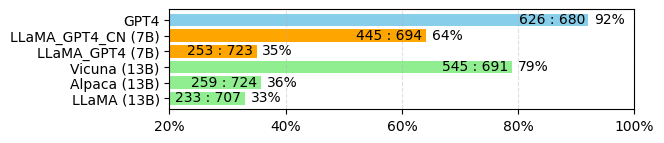

In [32]:
llama_to_question_t_gpt4_t_cn = [233.0, 707.0]
alpaca_to_question_t_gpt4_t_cn = [259.0, 724.0]
llama_gpt4_to_question_t_gpt4_t_cn = [253.0, 723.0]
llama_gpt4_cn_to_question_t_gpt4_t_cn = [356.0, 683.0]
llama_gpt4_cn_to_question_v2_t_gpt4_t_cn = [445.0, 694.0]



llama_gpt4_cn_to_question_v2_t_gpt4_g_cn = [463.0, 693.0]
gpt4_g_gpt4_t_cn = [626.5, 680.5]

vicuna_13b_to_question_v1_t_gpt4_g_cn = [545.0, 691.0]
vicuna_13b_to_question_v1_t_gpt4_t_cn = [526.5, 702.0]


name_list = [ 'LLaMA (13B)', 'Alpaca (13B)',  'Vicuna (13B)', 'LLaMA_GPT4 (7B)', 'LLaMA_GPT4_CN (7B)',  'GPT4'] # 'LLaMA_GPT4 (13B)'
score_list = [llama_to_question_t_gpt4_t_cn, alpaca_to_question_t_gpt4_t_cn, vicuna_13b_to_question_v1_t_gpt4_g_cn, llama_gpt4_to_question_t_gpt4_t_cn, llama_gpt4_cn_to_question_v2_t_gpt4_t_cn,  gpt4_g_gpt4_t_cn]
color_list = [ 'lightgreen', 'lightgreen',  'lightgreen', 'orange', 'orange', 'skyblue']

def plot_bar(score_list, name_list, xlim, file_name):
    ratios = []
    for lst in score_list:
        ratios.append(lst[0] / lst[1] * 100.0)

    fig=plt.figure(figsize=(6,1.3))
    ax = plt.gca()
    ax.xaxis.grid(True, linestyle='--', alpha=0.4)

    plt.barh(name_list, ratios, color=color_list)

    for index, value in enumerate(ratios):
        plt.text(value+1, index-.2, "{:.0f}%".format(value))
        plt.text(value-12, index-.2, f"{score_list[index][0]:.0f} : {score_list[index][1]:.0f}")

    plt.xlim(xlim[0], xlim[1])
    # Left Y-axis labels
    plt.xticks((20, 40, 60, 80, 100), ('20%', '40%', '60%', '80%', '100%'), color='k', size=10)
    plt.show()

plot_bar(score_list, name_list, (20, 100), 'output/bar_score_all_gen_cn_vs_gpt4_t_cn.pdf')

## Unnatural Instruction Breakdown Performance

In [35]:


import os, json

len_req = ['0-2', '3-5', '6-10', '10-', 'ALL']
print(res_dict)

{}


<ipython-input-44-a1d652ae740f>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-44-a1d652ae740f>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


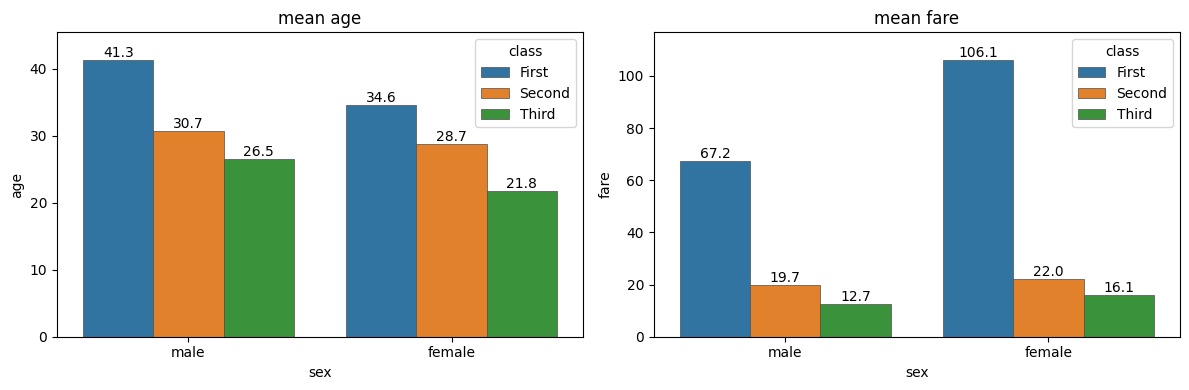

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

for ax, col in zip(axs, ['age', 'fare']):
    sns.barplot(
        x='sex',
        y=col,
        hue="class",
        data=titanic,
        edgecolor=".3",
        linewidth=0.5,
        ci=None,
        ax=ax
    )
    ax.set_title('mean ' + col)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.1f')
plt.tight_layout()
plt.show()
